In [1]:
#data https://www.kaggle.com/mchirico/montcoalert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
sns.set(rc={'figure.figsize':(11.7,8.27)})
data = pd.read_csv('911.csv')

<Figure size 576x288 with 0 Axes>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#TOP 5 CEP com mais chamadas 911
data['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
#TOP 5 Municipios com mais chamadas
data['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [8]:
#Numero de codigos exclusivos.
#len(data['title'].unique())
data['title'].nunique()

148

In [9]:
#Separando Razão e Departamentos
data['title'].iloc[0].split(':')[0]

'EMS'

In [10]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [11]:
data['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [12]:
#Motivo mais comum de chamada 911
data['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

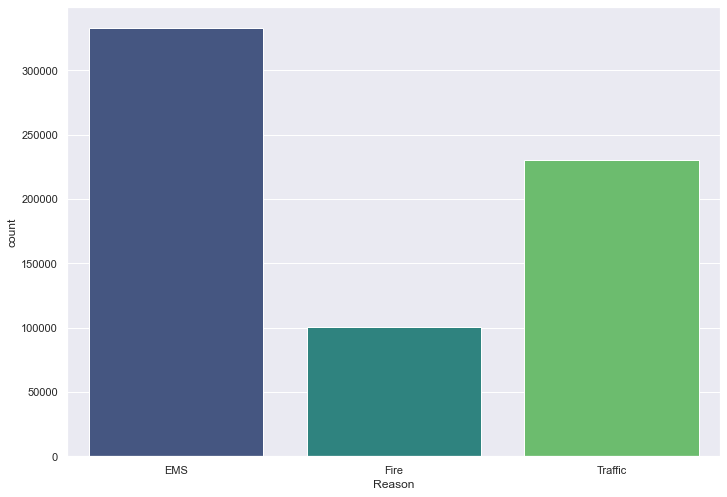

In [13]:
sns.countplot(x='Reason',data=data, palette='viridis')

In [14]:
#Tipo de dado
type(data['timeStamp'].iloc[1])

str

In [15]:
#Converter timeStamp para DateTime
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [16]:
data['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [17]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
time = data['timeStamp'].iloc[3]

In [19]:
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['Month'] = data['timeStamp'].apply(lambda x: x.month)
data['Day of week'] = data['timeStamp'].apply(lambda x: x.dayofweek)

In [20]:
data['Day of week'].value_counts()

4    102942
2     99157
3     98683
1     97684
0     96745
5     89452
6     78859
Name: Day of week, dtype: int64

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
data['Day of week'] = data['Day of week'].map(dmap)

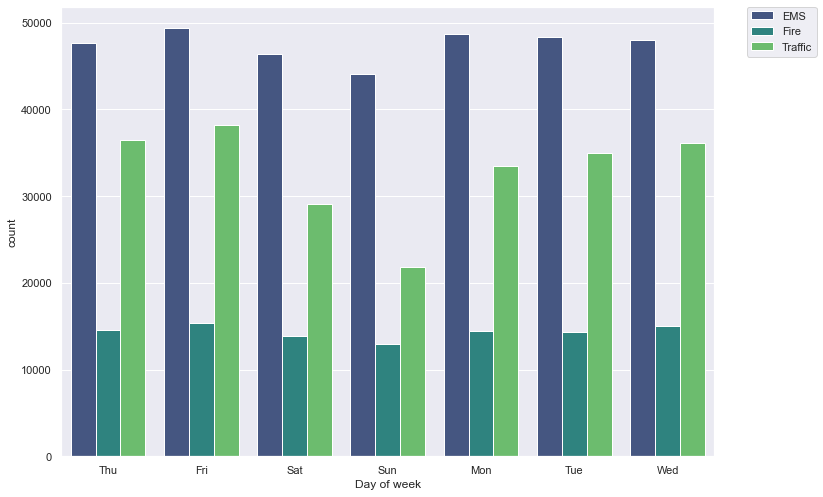

In [23]:
sns.countplot(x='Day of week',data=data,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

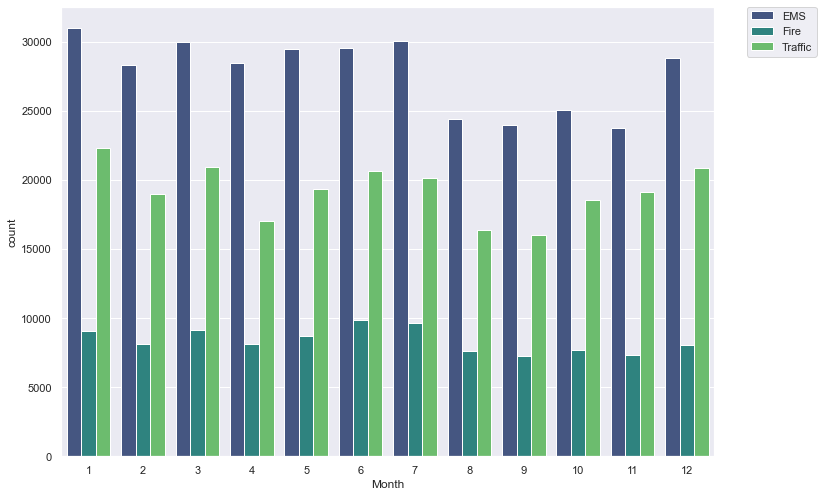

In [24]:
sns.countplot(x='Month',data=data,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [25]:
byMounth = data.groupby('Month').count()
byMounth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


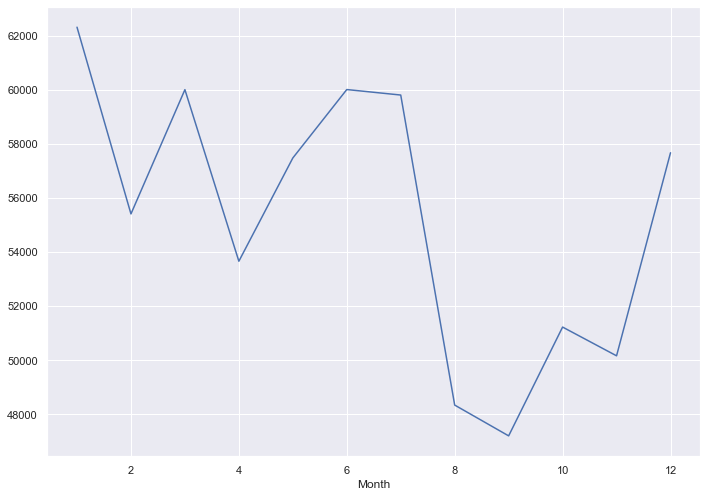

In [26]:
byMounth['twp'].plot()

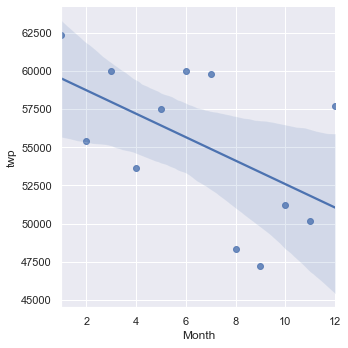

In [27]:
sns.lmplot(x='Month',y='twp',data=byMounth.reset_index())

In [28]:
data['Date'] = data['timeStamp'].apply(lambda x:x.date())

In [29]:
data['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [30]:
data.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


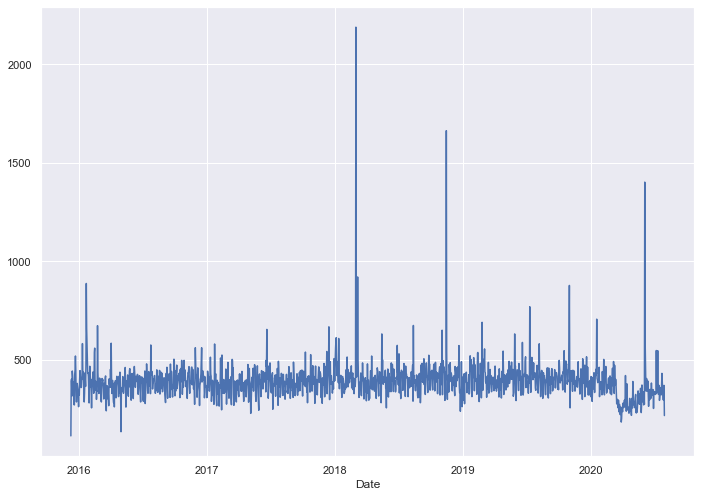

In [31]:
data.groupby('Date').count()['twp'].plot()

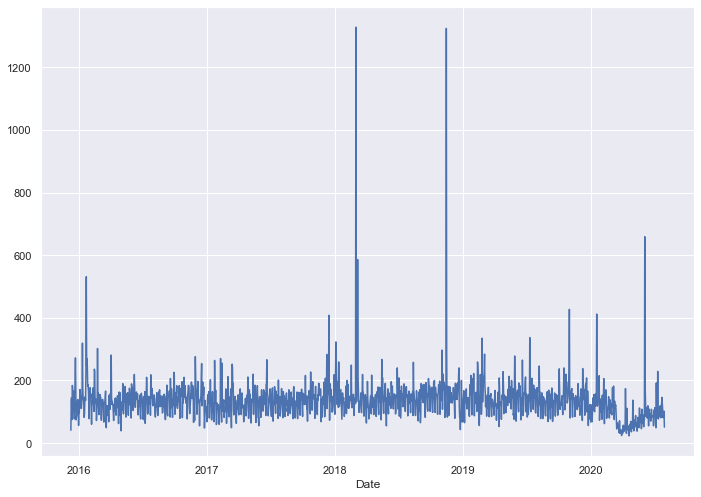

In [32]:
data[data['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

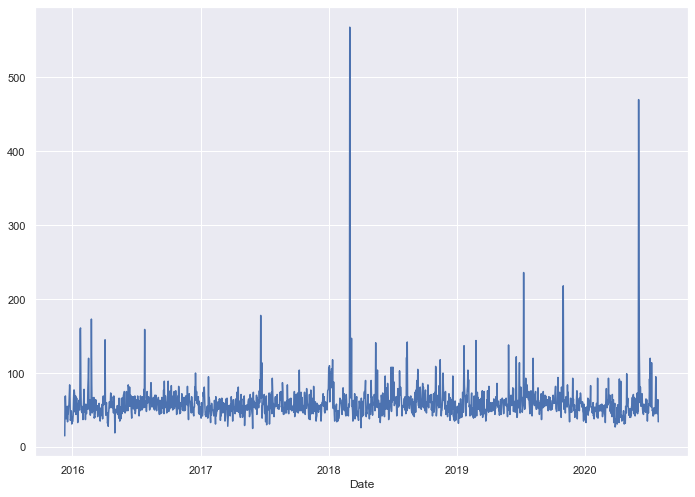

In [33]:
data[data['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

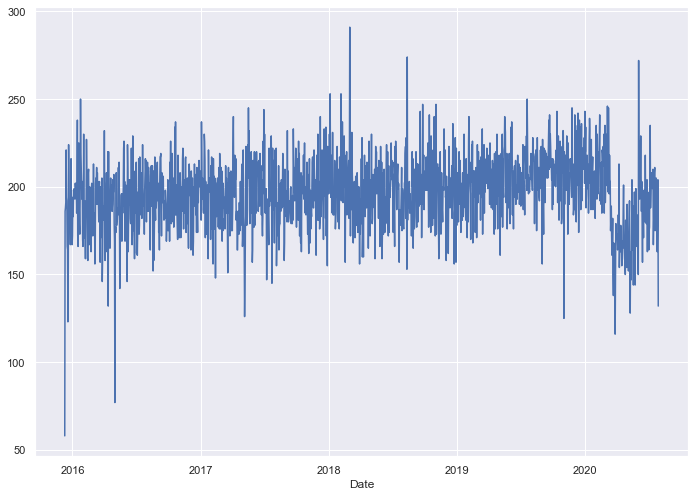

In [34]:
data[data['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [39]:
dayHour = data.groupby(by=['Day of week','Hour']).count()['twp'].unstack()

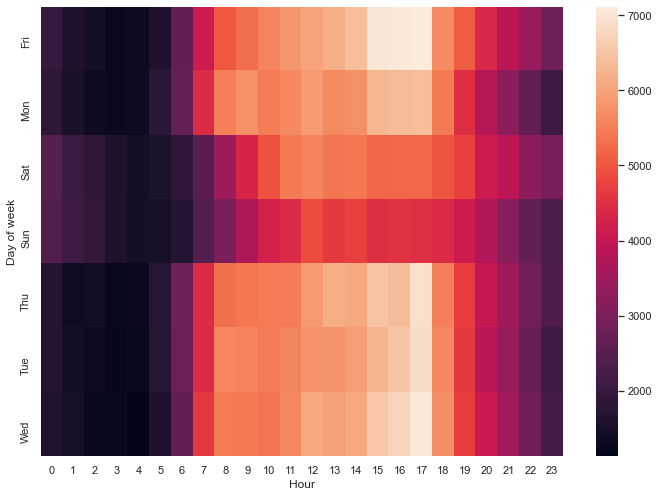

In [41]:
sns.heatmap(dayHour)

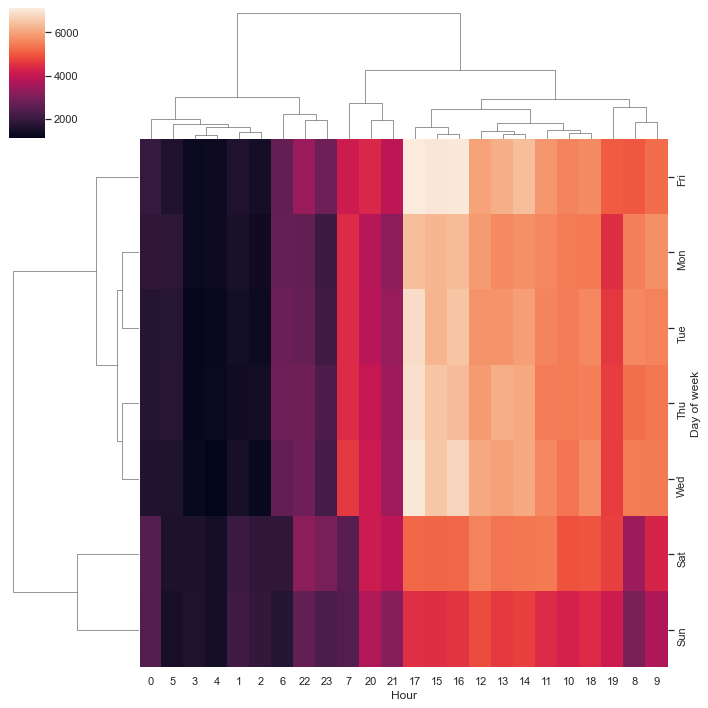

In [44]:
sns.clustermap(dayHour)

In [46]:
dayMonth = data.groupby(by=['Day of week','Month']).count()['twp'].unstack()

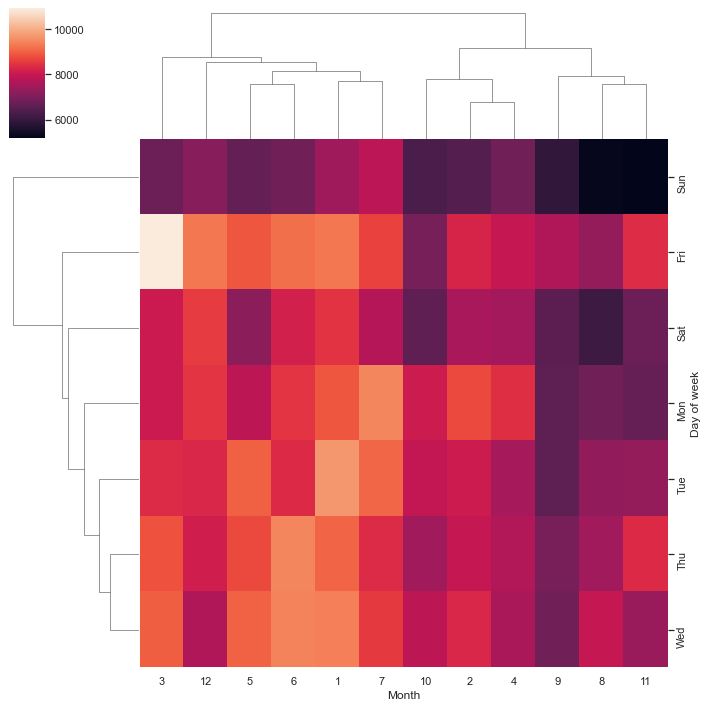

In [48]:
sns.clustermap(dayMonth)